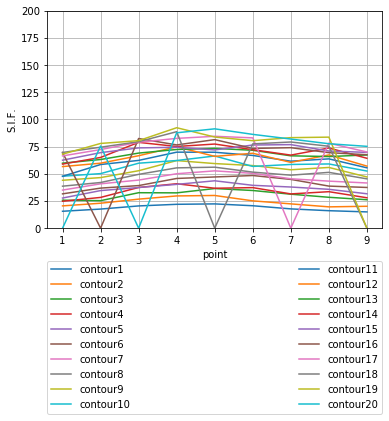

In [22]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\57_output_distance.xlsx')
read2 = pd.read_csv('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\data.csv', encoding = 'ISO-8859-1')
im =np.array(cv2.absdiff(cv2.imread('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\ff000001.jpg', cv2.IMREAD_GRAYSCALE ),
                         cv2.imread('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\ff000057.jpg', cv2.IMREAD_GRAYSCALE )))/255



crack_tip_loaction = np.array([[496,1473]])
data = np.array(read)
tension = np.array(read2)
tension_ml = tension[:,6]
tension_stress= tension[:,5]
ratio = 2/277*0.001 #70픽셀당 2mm , mm to m


distance=[]
Ml_intencity=[]
stress = []
K= []

for i in data:
    theta=i[5]
    calculater_location = np.array([[i[3],i[4]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[3]):int(i[3]+2),int(i[4]):int(i[4])+2])
    idx = (np.abs(tension_ml-value)).argmin()
    stress_value = tension_stress[idx]
    stress = np.append(stress,stress_value)
    Ml_intencity = np.append(Ml_intencity, value)
    k = fracture.K_deviator(stress_value, distance_value,theta)
    K= np.append(K,k)

#graph part
fig, ax1 = plt.subplots()
line1 = ax1.plot(data[0:9,2],K[0:9], label="contour1")
line2 = ax1.plot(data[9:18,2],K[9:18], label="contour2")
line3 = ax1.plot(data[18:27,2],K[18:27], label="contour3")
line4 = ax1.plot(data[27:36,2],K[27:36], label="contour4")
line5 = ax1.plot(data[36:45,2],K[36:45], label="contour5")
line6 = ax1.plot(data[45:54,2],K[45:54], label="contour6")
line7 = ax1.plot(data[54:63,2],K[54:63], label="contour7")
line8 = ax1.plot(data[63:72,2],K[63:72], label="contour8")
line9 = ax1.plot(data[72:81,2],K[72:81], label="contour9")
line10 = ax1.plot(data[81:90,2],K[81:90], label="contour10")
line11 = ax1.plot(data[90:99,2],K[90:99], label="contour11")
line12 = ax1.plot(data[99:108,2],K[99:108], label="contour12")
line13 = ax1.plot(data[108:117,2],K[108:117], label="contour13")
line14 = ax1.plot(data[117:126,2],K[117:126], label="contour14")
line15 = ax1.plot(data[126:135,2],K[126:135], label="contour15")
line16 = ax1.plot(data[135:144,2],K[135:144], label="contour16")
line17 = ax1.plot(data[144:153,2],K[144:153], label="contour17")
line18 = ax1.plot(data[153:162,2],K[153:162], label="contour18")
line19 = ax1.plot(data[162:171,2],K[162:171], label="contour19")
line20 = ax1.plot(data[171:180,2],K[171:180], label="contour20")




plt.grid()
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)
plt.ylim(0,200)
plt.xlabel('point')
plt.ylabel('S.I.F.')
plt.savefig('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle/k그래프.png')
plt.show()

data_union = {'Contour N.o.': data[:,1], 'point': data[:,2],
              'location_y': data[:,3], 'location_x': data[:,4],
              'theta': data[:,5], 'distance':distance,
              'ml_intencity':Ml_intencity, 'Stress':stress, 'K':K}
df = pd.DataFrame(data_union)
df.to_excel('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\kkk.xlsx')

In [55]:
rrrr =2/70 *0.0001

In [3]:
import winsound as sd

def beepsound():
    fr = 2000
    du = 1000
    sd.Beep(fr, du)

beepsound()